# Résolution d'équation differentielles - Application au pendule magnétique

## Consigne pour les comptes-rendus

Pour les comptes-rendus, deux possibilités au choix: 
- Comptes-rendus sous format d'un notebook (Jupyter)
- Comptes-rendus sous format pdf (LaTeX)

**Compte-rendu sous format d'un notebook:**
pour des comptes-rendus sous format d'un notebook, vous pouvez réaliser directement tout le compte-rendu sur ce notebook. Il devra inclure d'une part des blocs de programmes (en python: "`Code`") qui réalisent les différents exercices proposés, et des blocs de texte (en langage "`Markdown`") dans lequel vous analyserez et discuterez les résultats.


**Compte-rendu sous format pdf (LaTeX):**
vous pouvez également rendre les comptes-rendus sous forme d'un fichier .pdf réalisé en LaTex, à partir de résultats obtenus par les simulations en python. Il devra par exemple inclure des figures obenues par les différents programmes qui réalisent les différents exercices proposés. Dans le compte-rendu, il faudra également analyser et discuter ces résultats. Pensez à joindre les codes des programmes avec le compte-rendu.

**Instructions pour les codes:** 
pour les codes, pensez dans la mesure du possible, à mettre des commentaires (précédés du caractère #) expliquant par exemple ce que fait le code à un endroit donné, ou ce que représentent des variables. Plus un code est propre et bien commeté, plus il est facile à lire.

In [1]:
# Import libraries
import sys
import numpy as np
import matplotlib.pyplot as plt

###%matplotlib inline
%matplotlib notebook

## Méthode d'integration

### Méthode d'Euler

Soit $\frac{dS(t)}{dt} = F(t,S(t))$ une ODE du premier ordre explicitement définie. Autrement dit, $F$ est une fonction qui renvoie la dérivée, ou le changement, d'un état donné une valeur de temps et d'état. Aussi, soit $t$ une grille numérique de l'intervalle $[t_0, t_f]$ avec un espacement $h$. Sans perte de généralité, nous supposons que $t_0 = 0$, et que $t_f = Nh$ pour un entier positif, $N$.


L'approximation linéaire de $S(t)$ autour de $t_j$ à $t_{j+1}$ est

$$
S(t_{j+1}) = S(t_j) + (t_{j+1} - t_j)\frac{dS(t_j)}{dt},
$$

qui peut aussi s'écrire

$$
S(t_{j+1}) = S(t_j) + hF(t_j, S(t_j)).
$$

Cette formule s'appelle la **formule d'Euler explicite**, et elle nous permet de calculer une approximation de l'état à $S(t_{j+1})$ compte tenu de l'état à $S(t_j)$. A partir d'une valeur initiale donnée de $S_0 = S(t_0)$, on peut utiliser cette formule pour intégrer les états jusqu'à $S(t_f)$ ; ces valeurs $S(t)$ sont alors une approximation de la solution de l'équation différentielle. La formule d'Euler explicite est la méthode la plus simple et la plus intuitive pour résoudre les problèmes de valeur initiale. A n'importe quel état $(t_j, S(t_j))$ il utilise $F$ à cet état pour "pointer" vers l'état suivant puis se déplace dans cette direction sur une distance de $h$. Bien qu'il existe des méthodes plus sophistiquées et plus précises pour résoudre ces problèmes, elles ont toutes la même structure fondamentale. En tant que tel, nous énumérons explicitement les étapes de résolution d'un problème de valeur initiale à l'aide de la formule d'Euler explicite.


<img src="image/Euler-method.png" alt="explicit Euler" title="L'illustration de la méthode explicite d'Euler.." width="400"/>

**QUE SE PASSE-T-IL ?** Supposons qu'on nous donne une fonction $F(t, S(t))$ qui calcule $\frac{dS(t)}{dt}$, une grille numérique, $t$, de l'intervalle, $[t_0, t_f]$, et une valeur d'état initial $S_0 = S(t_0)$. Nous pouvons calculer $S(t_j)$ pour chaque $t_j$ dans $t$ en suivant les étapes suivantes.

1. Stockez $S_0 = S(t_0)$ dans un tableau, $S$.
2. Calculez $S(t_1) = S_0 + hF(t_0, S_0)$.
3. Stockez $S_1 = S(t_1)$ dans $S$.
4. Calculez $S(t_2) = S_1 + hF(t_1, S_1)$.
5. Stockez $S_2 = S(t_1)$ dans $S$.
6. $\cdots$
7. Calculez $S(t_f) = S_{f-1} + hF(t_{f-1}, S_{f-1})$.
8. Stockez $S_f = S(t_f)$ dans $S$.
9. $S$ est une approximation de la solution du problème de la valeur initiale.

Lorsqu'on utilise une méthode avec cette structure, on dit que la méthode **intègre** la solution de l'ODE.


### Méthode de Verlet

La méthode de Verlet est une méthode numérique de résolution des équations différentielles pour les problèmes de mécanique classique. C'est une méthode symplectique, ce qui signifie qu'elle conserve les propriétés géométriques de l'espace des phases du système, telles que l'aire, le volume, etc. Elle est donc particulièrement adaptée pour les problèmes de mécanique classique où la conservation de l'énergie est importante.

Selon l'algorithme de Verlet, la discrétisation selon la série temporelle est
\begin{align}
v(t+\frac{1}{2}\Delta t) &= v(t) + \frac{1}{2}a(t)\Delta t \\
x(t+\Delta t) &=x(t) + v(t+\frac{1}{2}\Delta t)\Delta t \\
a(t+\Delta t) &= f(x(t+\Delta t),v(t+\frac{1}{2}\Delta t)) \\
v(t+\Delta t) &= v(t+\frac{1}{2}\Delta t) + \frac{1}{2}a(t+\Delta t)\Delta t\,,
\end{align}
où $x(t)$ est la position à l'instant $t$, $v(t)$ et $a(t)$ sont respectivement la vitesse et l'accélération à l'instant $t$, et $\Delta t$ est le pas de temps. La fonction $f(x,v)$ est en fait la résultante des forces (divisée par la masse). La méthode de Verlet calcule la position et la vitesse de la particule à différents moments de temps en utilisant la formule ci-dessus. Elle est appelée méthode à deux pas car elle nécessite deux calculs de position pour calculer la vitesse à mi-chemin entre deux temps.
Le système précédent peut être réécrit de la manière suivante
\begin{align}
x(t+\Delta t) &=x(t) + v(t)\Delta t + \frac{\Delta t^2}{2}a(t) \\
a(t+\Delta t) &= f(x(t+\Delta t),v(t+\frac{1}{2}\Delta t)) \\
v(t+\Delta t) &= v(t) + \frac{\Delta t}{2}[a(t) + a(t+\Delta t)] \,.
\end{align}




## Applications 0: Entrainement et codages (Méthode d'Euler)

1) L'équation différentielle $\frac{df(t)}{dt} = e^{-t}$ avec la condition initiale $f_0 = -1$ a la solution exacte $f(t) = - e^{-t}$. Approchez la solution de ce problème de valeur initiale entre 0 et 1 par incréments de 0,1 à l'aide de la formule d'explicité d'Euler, et sauvegardez la solution dans un tableau.

2) Tracez la différence entre la solution approchée et la solution exacte.

3) On voit que chaque point est une approximation basée sur le point précédent de manière linéaire. A partir de la valeur initiale, on peut éventuellement obtenir une approximation de la solution sur la grille numérique. Vérifier que si nous répétons le processus pour $h = 0,01$, nous obtenons une meilleure approximation de la solution :

In [5]:
def euler(F, t0,tf,y0,h):
    #initialisation des conditions initiales
    y=y0
    t = t0
    
    #tableau des valeurs pour la solution de l'ED, de la variable de l'ED et de -exp(-t)
    Y = [y0]
    T = [t0]
    V=[-1]
    
    for k in range(50):
        y = y + h*F(t)
        t = t + h
        Y.append(y)
        T.append(t)
        V.append(-np.exp(-t))
    return T,Y,V

def F(t):
    return np.exp(-t)

T,Y ,V= euler(F,0,1,-1,0.1)

#print(T)
#print(Y)
#print(V)

# create a figure and axis object
fig, ax = plt.subplots()

# plot the function
ax.plot(T, Y)
ax.plot(T, V)
# set the axis labels
ax.set_xlabel('T')
ax.set_ylabel('Y')


# set the title of the plot
ax.set_title('titre')

fig.savefig("figure.jpg") # save as jpg

# display the plot
plt.show()



 

## Applications 0-B: Entrainement et codages (Méthode de Verlet)

En utilisant les équations de la cinématique, écrire un programme en python qui simule le mouvement parabolique d'un objet soumis à la pesanteur. Le programme doit permettre à l'utilisateur de définir les paramètres initiaux tels que la hauteur initiale, la vitesse initiale, l'angle de tir, la masse de l'objet et la résistance de l'air. Le programme doit tracer la trajectoire de l'objet ainsi que sa vitesse et son accélération en fonction du temps. Le résultat doit être affiché dans une fenêtre graphique. 

### Modélisation du problème

Pour rafiner le modèle, on pourra prendre en compte les frottements visqueux de l'air sous la forme:
$$\vec{F}_v = \frac{1}{2} C_d \rho  A |\vec{v}|^2\vec{v}$$
oú $\rho$ est la densité de l'air à 15$^\circ C$ (en $kg/m^3$), $C_d$ est le coefficient de frottement de l'objet dans l'air, et $A$ l'aire de la section transversale de l'objet (en $m^2$)


### Détails
Le programme utilisera les constantes suivantes :

- `g` : l'accélération gravitationnelle (9,81 m/s^2)
- `m` : la masse de l'objet (0.1 kg)
- `rho` : la densité de l'air à 15°C (1.225 kg/m^3)
- `Cd` : le coefficient de frottement de l'objet dans l'air (0.47)
- `A` : l'aire de la section transversale de l'objet (0.01 m^2)

De plus le programme utilisera les conditions initiales sur la position et la vitesse :

- `v0` : la vitesse initiale (20 m/s)
- `theta` : l'angle de tir (45 degrés, soit pi/4 radians)
- `x0` : position initiale en x=0 (en m)
- `y0` : la position initiale en y=0 (en m)
- `tmax` : le temps maximum de la simulation (5 s)

Il devra ensuite calculer les composantes de la vitesse initiale (`vx0` et `vy0`), discrétiser le temps avec un pas de $0,01 s$ et initialiser les tableaux de position et de vitesse avec des valeurs initiales. Ensuite, il fera une boucle sur les temps et calculera la nouvelle position et la nouvelle vitesse à chaque itération, en utilisant l'algorithme de Verlet. 

Finalement, le programme tracera la trajectoire de l'objet en utilisant les tableaux de position $x$ et $y$. Le résultat est un graphique qui montre la trajectoire de l'objet soumis à la pesanteur.

**Étude du rebond:** Si l'objet touche le sol ($y < 0$), le programme inversera la vitesse verticale et la position pour simuler un rebond.

**Algorithme de Verlet:** Dans l'algorithme de Verlet, la mise à jour de l'accelération
$$a(t+\Delta t) = f(x(t+\Delta t),v(t+\frac{1}{2}\Delta t)) $$ fait intérvenir la fonction $f(x)$. Dans les problèmes de cinématique qui nous intéresse, cette fonction $f(x,v)$ est en fait la résultante des forces (divisée par la masse).

**Résultante des forces:** pour le calucl de la résultante des forces, on pourra par exemple s'inspirer de la fonction `prototype_resultante(r,v)` suivante. Cette fonction prend comme argument deux tableaux `r` et `v` et renvoie un tableau (de même) taille.

In [11]:
## prototype de fonction pour calculer la résultante
def prototype_resultante(r,v):
    F1 = -0.1*v  # force 1
    F2 = [0, -1] # force 2
    return F1 + F2

# On définit des vecteurs de taille 2
r = np.zeros(2) 
v = np.ones(2) 

## Appelle de la fonction
print(prototype_resultante(r,v))


### Détails

1) Il faudra au préalable faire l'étude analytique d'après les théorèmes de la cinématique.
2) Ensuite, il faudra écrire un algorithme de Verlet qui résolve numériquement les équations différentielles
3) Enfin il faudra implémenter des conditions de rebond (avec amortissement par exemple)

**On pourra utiliser le squelette de programme suivant**

<IPython.core.display.Javascript object>


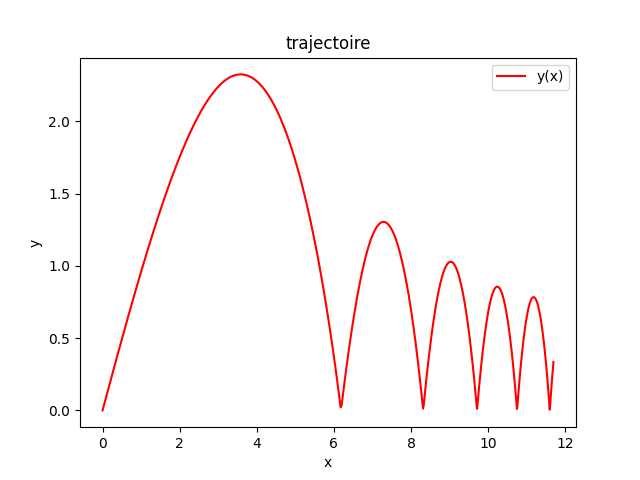

In [6]:
##### Squelette du probleme a resoudre
####################################################

# Constantes physiques
g =9.81 # l'accélération gravitationnelle
m =0.1 #  la masse de l'objet 
rho =1.225 # la densité de l'air à 15°C
Cd = 0.47 # le coefficient de frottement de l'objet dans l'air
A =  0.01 #  l'aire de la section transversale de l'objet



# Conditions initiales
v0 = 20.0  # vitesse initiale (en m/s)
theta = np.pi/4 # angle de tir (en degrés)
y0 = 0.0  # position initiale en y (en m)
x0 = 0.0  # position initiale en y (en m)

##########################
### Fonctions calculant la résultante des forces
def Resultante(r,v):
    Fv=-0.5*(Cd*rho*A)*(v[0]**2 + v[1]**2)*v
    Fg=[0,-m*g]
    return Fv+Fg

##########################
### Initialisation du problème
N = 501
t = np.linspace(0, 5, N); dt  = t[1]-t[0] 
r= np.zeros((N,2)) 
v = np.zeros_like(r)
a = np.zeros_like(r)


### Conditions initiales
a[0]=Resultante(r[0],v[0])/m
v[0]=[v0*np.cos(theta),v0*np.sin(theta)]
###Boucle temporelle pou rl'algorithme de Verlet
for i in range (0,N-1):
    # la valeur de la position 
    r[i+1]= r[i] + v[i]*dt+ 0.5*a[i]*dt**2
    
    # la valeur de l'accélération
    a[i+1]=Resultante(r[i+1],v[i]+ 0.5*a[i]*dt)/m
    
    # la valeur de vitesse
    v[i+1] = v[i]+ 0.5*a[i]*dt + 0.5*a[i+1]*dt
    
    # Rebond
    if r[i+1][1]<0:
        r[i+1][1]=-r[i+1][1]
        v[i+1][1]=-v[i+1][1]


    
    
    
    
########################
# graphique r

# create a figure and axis object
fig, ax = plt.subplots()

# plot the function
ax.plot(r[:,0],r[:,1], 'r-', label='y(x)')

# set the axis labels
ax.set_xlabel('x')
ax.set_ylabel('y')

# set the title of the plot
ax.set_title('trajectoire')

# display the plot
plt.legend()
plt.show()



## Application: Le pendule magnétique et trois aimants



On considère ici un pendule avec un aimant à son extrémité, comme illustré ci-dessus. Le pendule oscille librement entre trois aimants, de couleur bleu, rouge et jaune. 
<img src="image/magpendulum.jpg" width="400"/>
Le pendule magnétique est attiré par chacun des trois aimants avec la même force, et il finira par s'immobiliser sur l'un d'eux. Mais le point d'arrivée dépend très sensiblement du point de départ. Comme on peut s'y attendre, si on démarre le pendule sur l'un des aimants, il restera sur cet aimant. Mais si on tire le pendule ailleurs et qu'on le relâche, la trajectoire du pendule est très difficile à prévoir.


Trois traces sont présentées ci-dessous, où le pendule est démarré à partir de positions de départ différentes entre les aimants. Cependant, le pendule suit des trajectoires complètement différentes dans chaque cas, et il vient se reposer sur des aimants différents.
<table><tr>
<td>    <img src='image/Trajectoire-0.png' width="400" /> </td>  
<td>    <img src='image/Trajectoire-1.png' width="400" /></td>  
</tr><tr>
<td>    <img src='image/Trajectoire-2.png' width="400" /> </td>  
<td>    <img src='image/Trajectoire-3.png' width="400" /></td>  
</tr></table>
On essaiera d'écrire l'attracteur étrange de ce système, c'est-à-dire une carte des résultats pour toutes les conditions de départ possibles du pendule. Pour chaque point de départ, une simulation informatique déterminera le point de repos final du pendule, et nous colorerons le point de départ de la même couleur que l'aimant où le pendule s'arrête.
On verra qu'on finira par arriver sur une figure similaire à celle ci-dessous:
<img src="image/attractor.jpg" width="400"/>


Plus de lecture
[ici](https://chalkdustmagazine.com/features/the-magnetic-pendulum/)
ou
[ici](https://chalkdustmagazine.com/features/the-magnetic-pendulum/)
.

### Mise en équations

On part de la mécanique Newtonienne...
(**exercice intéressant à faire, mais pas le temps de le taper**)

Au final, après un quelques calculs, et certaines approximation, 
on peut montre que le mouvement du pendule aimanté peut être décrit simplement par la projection des coordonées du pendule sur le plan horizontal: $\vec{r}\equiv(x,y)$. Après redéfinition d'un certain nombre de constantes, on obtien finalement le système suivant 
dćrivant les petites oscillations:
\begin{align}
    \vec{a} &= \vec{G}(\vec{r},\vec{v})  
    \,, \\ \text{avec}~~~
    \vec{G}(\vec{r},\vec{v}) &= 
        \sum_{i=1}^3\frac{\vec{r}_i-\vec{r}}{(|\vec{r}_i-\vec{r}|^2+d^2)^{3/2}}
        +R\vec{v}+C\vec{x} \,,
\end{align}
où $\vec{a}=\frac{d\vec{v}}{dt}$ est l'accélération et $\vec{v}=\frac{d\vec{r}}{dt}$.
Le terme de droite de l'équation d'évolution, $\vec{G}$, est en fait la résultante des forces agissant sur le pendule (après projection et redéfinition des constantes). Le premier terme de $\vec{G}$ est l'intéraction avec les aimants d'après la loi de Coulomb. Le second et le troisième terme de $\vec{G}$ sont respectivement les forces de frottements visqueux et la force de rappel du pendule due à la pesanteur.

#### Détails 
* On considérera que les aimants sont positionés à équi-distance sur un cercle de rayon `Ra=0.25`, et hauteur au repos `d=0.10`
* On prendra par exemple les constantes `C=0.40` et `R=0.50`
* et un temps raisonable d'évolution `t_max=10` pour `N = 1000` pas de temps

### Problèmes à étudier


**Exercices préliminaires:**
1. Essayer de dériver l'équation d'évolution d'après les lois de la cinématique
2. 
3.  

**Étude de la trajectoire (en `python`)**
1. Écrire une fonction qui renvoie la veur de la fonction $\vec{G}(\vec{r},\vec{v})$
2. Écrire un programme utilisant l'algorithme de Verlet, qui calcule la trajectoire du pendule. 
3. Visulaiser cette trajectoire, et constater qu'en changeant légèrement les conditions initiales, la trajectoire change en fait beaucoup.


**Étude de l'influence des conditions initiales:** 
Pour cela il faudra légèrement modifier le programme pour l'accélérer un peu. Comme on ne s'intéresse pas ici aux trajectoires, mais plutôt à l'influence des conditions initiales, on pourra faire évoluer l'algorithme de Verlet, sans rien sauvegarder d'autre que le résultat final.
1. En utilisant les fonctions précédents, écrire un code qui teste séquentiellement le résultat de la convergence, en fonction de tous les choix initiaux possible dans un domaine prédéterminé. On prendra par exemple le domaine $(x,y)\in[-0.5;0.5]\times[-0.5;0.5]$, pour 10 valeurs de $x$ et 10 valeurs de $y$. L'ensemble des données dans ce domaine sera donc $10\times10=100$. Le résultat sera donc une matrice $10\times10$, dont les entrées seront 0,1,2 en fonction de vers quelaimant  l'algorithme converge.
2. Représenter l'image du résultat en fonction de la position initiale du pendule.


**Analyse détaillée**
1. Rééssayer avec une grille relativement fine, mais de sorte que le temps de calcul soit encore raisonable.


**Structure fractale**
1. On ne peut pas augmenter indéfiniment la résolution. Par contre on peut déplacer et réduire la fenêtre $(x,y)\in[0.25;0.45]\times[0.25;0.45]$ pour zoomer sur des partie intéressantes.
2. Étudier comment évoluent les figures en fonction du zoom.



KeyboardInterrupt: 

**Structure fractale**
On fera apparaitre des strctures fractales de la forme suivante
<table><tr>
<td>    <img src='image/fractale-0.png' width="400" /> </td>  
<td>    <img src='image/fractale-1.png' width="400" /></td>  
</tr></table>


## Pour aller plus loin 

Ces algos ne sont pas tres optimises. 
on pourra chercher a reproduire ces choses avec la librairie `scipy`

[exemples](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter22.00-ODE-Initial-Value-Problems.html)

Comme vous pouvez le penser, Python a les fonctions existantes de recherche de racine que nous pouvons utiliser pour faciliter les choses. La fonction que nous allons utiliser pour trouver la racine est *f_solve* de *scipy.optimize*.

La fonction *f_solve* prend de nombreux arguments que vous pouvez trouver dans la [documentation](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter22.06-Python-ODE-Solvers.html), mais le plus important deux est la fonction dont vous voulez trouver la racine et la supposition initiale.


## Exercises supplementaires

[lien](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter22.08-Summary-and-Problems.html)